In [1]:
! pip install inference

In [2]:
from inference_sdk import InferenceHTTPClient
from inference import get_model
import supervision as sv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont


In [3]:
! pip install Roboflow

In [4]:
# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)
# infer on a local image
result = CLIENT.infer("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/00024.jpg", model_id="manga-text-detection/2")

In [5]:
result

{'time': 0.48382916499997464,
 'image': {'width': 846, 'height': 1200},
 'predictions': [{'x': 172.265625,
   'y': 373.2421875,
   'width': 164.0625,
   'height': 193.359375,
   'confidence': 0.9807046055793762,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '573f97d4-1f38-4b31-801f-41b44129dd9b'},
  {'x': 725.390625,
   'y': 827.9296875,
   'width': 103.125,
   'height': 153.515625,
   'confidence': 0.9779056906700134,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '8d0a03e4-cbdb-42e8-bbbc-01a4c10787bf'},
  {'x': 140.625,
   'y': 655.6640625,
   'width': 98.4375,
   'height': 158.203125,
   'confidence': 0.9775882363319397,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '4ebea013-69f3-42e9-861e-ce754d585522'},
  {'x': 519.7265625,
   'y': 1019.5312499999999,
   'width': 97.265625,
   'height': 192.1875,
   'confidence': 0.9754019379615784,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': 'cbfd839a-602b-4148-8357-6f4f520

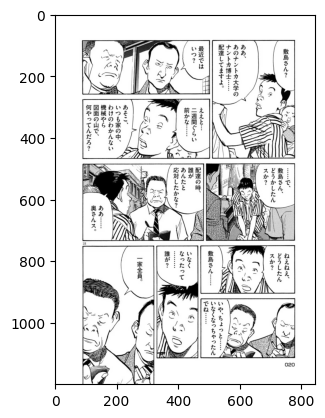

In [6]:
img = cv.imread("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/00024.jpg")
img_trials = img.copy()

plt.imshow(img_trials)

In [51]:
img_pil = Image.fromarray(img_trials)
draw = ImageDraw.Draw(img_pil)

for prediction in result['predictions']:
    if prediction['class'] == 'text_bubble':
        x = round(prediction['x'])
        y = round(prediction['y'])
        width = round(prediction['width'])
        height = round(prediction['height'])

        margin = 10
        x1 = round(x - width / 2) + margin
        y1 = round(y - height / 2) + margin
        x2 = round(x + width / 2) - margin
        y2 = round(y + height / 2) - margin

        cx = (x1 + x2) / 2
        cy = (y1 + y2) / 2
        rx = (x2 - x1) / 2
        ry = (y2 - y1) / 2

        shape = [(cx - rx, cy - ry), (cx + rx, cy + ry)]
        #draw.ellipse(shape, fill="white")

        draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=30)
        #img_covered = cv.rectangle(img_trials, (x1,y1),(x2,y2),(255,255,255),-1)


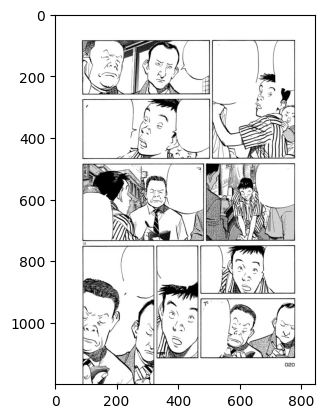

In [52]:
plt.imshow(img_pil)